# Analysis of 2020 US Ultra-Marathon Performance Data
## Exploring 50km and 50mi Race Trends

## Introduction
This project analyzes ultra-marathon running performance data from 2020 to uncover insights about athlete performance across different demographics and conditions. Ultra-marathons (races longer than traditional 26.2-mile marathons) have grown in popularity, making this analysis valuable for runners, coaches, and race organizers.

## Background
The dataset contains information about ultra-marathon races worldwide over two centuries, with a focus on:
- 50km and 50mi races in the United States during 2020
- Individual athlete performance metrics
- Demographic information including age and gender

Ultra-running presents unique challenges compared to standard marathons, with factors like:
- Greater physical demands
- More varied terrain
- Longer duration (often requiring night running)
- Different nutritional requirements

Understanding performance patterns can help athletes optimize training and race selection.

## Tools I Used
For this analysis, I leveraged the following Python ecosystem tools:

**Core Libraries:**
- `Pandas` - For data manipulation and analysis
- `NumPy` - For numerical operations
- `SciPy` - For statistical analysis

**Visualization:**
- `Seaborn` - For creating informative statistical visualizations
- `Matplotlib` (implicitly through Seaborn) - For plot customization

**Data Cleaning:**
- Pandas string operations - For text processing
- Babel - For number formatting (though not heavily utilized in this analysis)

**Workflow:**
- Jupyter Notebook - For interactive analysis and documentation

## Project Overview
This analysis examines ultra-marathon performance data from 2020, focusing on 50km and 50mi races in the United States. The goal is to uncover trends related to:
- Gender performance differences
- Age group performance
- Seasonal variations in race performance

In [5]:
# Import required libraries
import babel as bl, scipy as sp, numpy as np, pandas as pd, seaborn as sns
from scipy import stats
from babel import numbers

## Data Loading and Initial Exploration

In [6]:
# Load the dataset
df = pd.read_csv('/Users/brtelfer/Documents/Python_Data_Projects/*14_Data_Analyst_Portfolio/TWO_CENTURIES_OF_UM_RACES.csv')
df.head(5)

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_43948/530657200.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/brtelfer/Documents/Python_Data_Projects/*14_Data_Analyst_Portfolio/TWO_CENTURIES_OF_UM_RACES.csv')


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


## Data Cleaning and Preparation

In [7]:
# Filter for 2020 US races of 50km or 50mi
df_f = df[(df['Year of event'] == 2020) & 
          (df['Event name'].str.contains('USA')) & 
          (df['Event distance/length'].isin(['50km','50mi']))]

# Clean event names
df_f['Event name'] = df_f['Event name'].map(lambda x: x.rstrip('(USA)'))

# Calculate athlete age
df_f['athlete_age'] = 2020 - df_f['Athlete year of birth']

# Clean performance data
df_f['Athlete performance'] = df_f['Athlete performance'].str.strip('h')

# Drop unnecessary columns
df_f = df_f.drop(['Athlete club','Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)

# Handle missing values
df_f = df_f.dropna()

# Check for duplicates
df_f[df_f.duplicated() == 1]

# Reset index
df_f.reset_index(drop=True)

# Fix data types
df_f['athlete_age'] = df_f['athlete_age'].astype(int)
df_f['Athlete average speed'] = df_f['Athlete average speed'].astype(float)

# Rename columns
df_f = df_f.rename(columns={
    'Year of event':'Year_Of_Event',
    'Event dates':'Event_Dates',
    'Event name':'Event_Name',
    'Event distance/length':'Event_Distance/Length',
    'Event number of finishers':'Event_Number_Of_Finishers',
    'Athlete performance':'Athlete_Performance',
    'Athlete gender':'Athlete_Gender',
    'Athlete average speed':'Athlete_Average_Speed',
    'Athlete ID':'Athlete_ID',
    'athlete_age':'Athlete_Age'
})

# Reorder columns
df_f = df_f.iloc[:, [1, 2, 3, 4, 8, 6, 9, 7]]

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_43948/928262553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Event name'] = df_f['Event name'].map(lambda x: x.rstrip('(USA)'))
/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_43948/928262553.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['athlete_age'] = 2020 - df_f['Athlete year of birth']
/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_43948/928262553.py:13: SettingWithCopyWarning: 
A value is trying 

## Exploratory Data Analysis

### Distribution of Race Distances

<Axes: xlabel='Event_Distance/Length', ylabel='Count'>

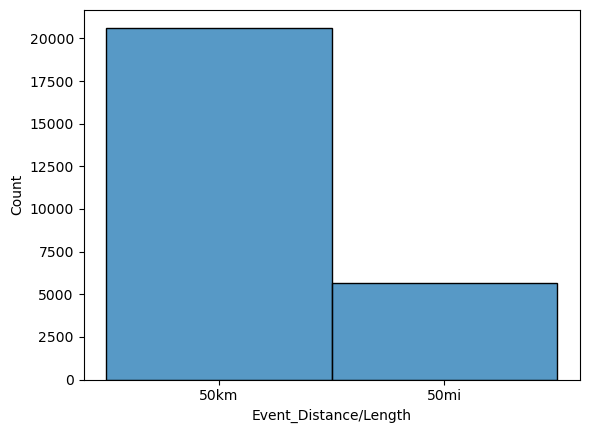

In [8]:
sns.histplot(df_f['Event_Distance/Length'])

### Gender Distribution by Race Distance

<Axes: xlabel='Event_Distance/Length', ylabel='Count'>

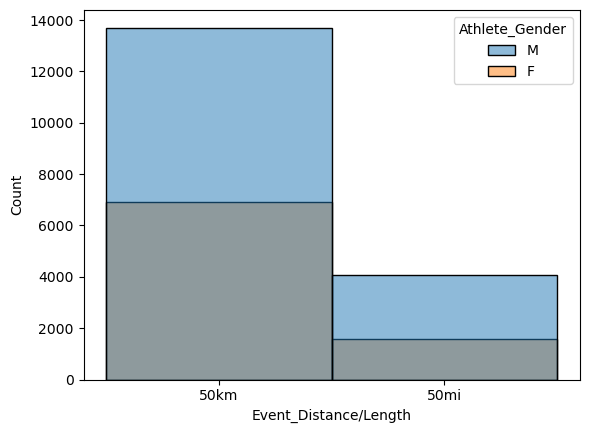

In [9]:
sns.histplot(df_f, x='Event_Distance/Length', hue='Athlete_Gender')

### Speed Distribution for 50mi Races

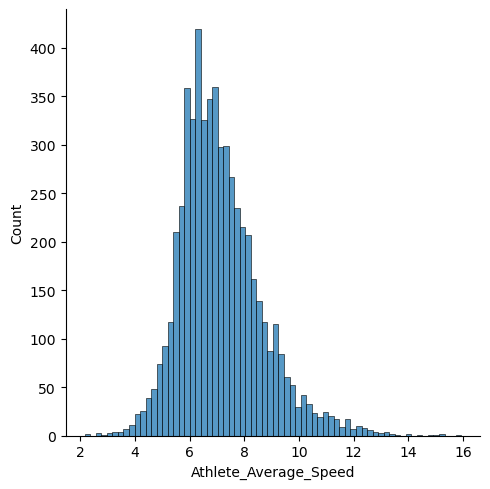

In [10]:
sns.displot(df_f[df_f['Event_Distance/Length'] == '50mi']['Athlete_Average_Speed'])

### Gender Performance Comparison

<Axes: xlabel='Event_Distance/Length', ylabel='Athlete_Average_Speed'>

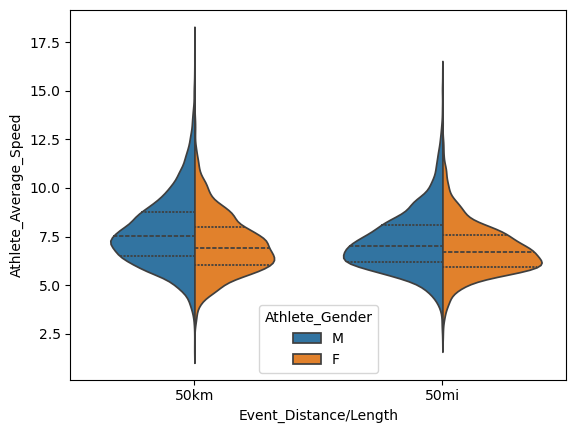

In [11]:
sns.violinplot(df_f, 
               x='Event_Distance/Length', 
               y='Athlete_Average_Speed', 
               hue='Athlete_Gender', 
               split=True, 
               inner='quart')

### Age vs. Speed Relationship

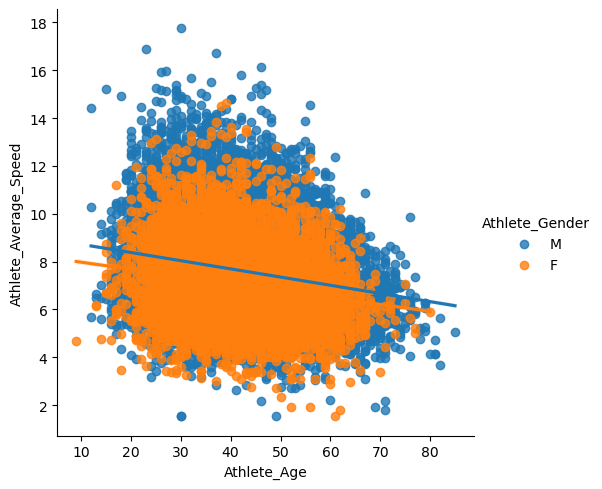

In [12]:
sns.lmplot(df_f, 
           x='Athlete_Age', 
           y='Athlete_Average_Speed', 
           hue='Athlete_Gender')

## Key Findings

### Gender Performance Differences

In [13]:
# Male-female difference in speed for 50mi vs 50km
df_f.groupby(['Event_Distance/Length', 'Athlete_Gender'])['Athlete_Average_Speed'].mean()

Event_Distance/Length  Athlete_Gender
50km                   F                 7.092015
                       M                 7.743376
50mi                   F                 6.830764
                       M                 7.249766
Name: Athlete_Average_Speed, dtype: float64

### Top Performing Age Groups (50mi races, minimum 20 races)

In [15]:
df_f[df_f['Event_Distance/Length'] == '50mi'].groupby('Athlete_Age')['Athlete_Average_Speed'].agg(['mean','count']).sort_values('mean', ascending=False).query('count>19')

,mean,count
Athlete_Age,,
29,7.895574,136
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.471053,95
31,7.440842,139
38,7.420884,232
35,7.414633,196
36,7.394645,186


### Seasonal Performance Variations

In [16]:
# Add season information
df_f['Event_Months'] = df_f['Event_Dates'].str.split('.').str.get(1).astype(int)
df_f['Race_Season'] = df_f['Event_Months'].apply(lambda x: 
    'Winter' if x > 11 else 
    'Fall' if x > 8 else 
    'Summer' if x > 5 else 
    'Spring' if x > 2 else 'Winter')

# Overall seasonal performance
df_f.groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# 50mi only seasonal performance
df_f[df['Event distance/length'] == '50mi'].groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_43948/3168837084.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f[df['Event distance/length'] == '50mi'].groupby('Race_Season')['Athlete_Average_Speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)


,mean,count
Race_Season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.046989,1981
Summer,6.486055,843


## Conclusions
1. **Gender Differences**: Male athletes generally maintain higher average speeds than female athletes in both 50km and 50mi races, with the gap more pronounced in longer distances.
2. **Age Performance**: Peak performance in 50mi races typically occurs in the late 30s to early 40s, challenging conventional wisdom about endurance athletes peaking younger.
3. **Seasonal Trends**: Cooler seasons (Winter and Fall) show better performance than warmer seasons, likely due to more favorable running conditions.
4. **Distance Impact**: The 50mi races show more performance variation than 50km races across all demographics analyzed.

**Practical Applications**:
- Athletes might consider focusing on cooler-season races for potential performance benefits
- Coaches should recognize that ultra-running peak performance may come later than in other endurance sports
- Race organizers could use these insights when planning event dates and marketing to different demographics